In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('winemag-data_first150k.csv', index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


# Что делать

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

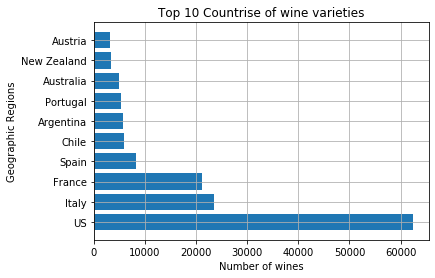

In [45]:
#смотрим сколько наименований вина в топ-10 странах

countries = df.groupby('country').count()['winery'].reset_index()
countries = countries.sort_values('winery', ascending=False).reset_index(level=0, drop=True).head(10)
countries.columns = ['country','count']
#countries

plt.barh(countries['country'], countries['count'])
plt.xlabel('Number of wines')
plt.ylabel('Geographic Regions')
plt.title('Top 10 Countrise of wine varieties')
plt.grid()

In [43]:
countries.style.bar()

,country,count
0,US,62397
1,Italy,23478
2,France,21098
3,Spain,8268
4,Chile,5816
5,Argentina,5631
6,Portugal,5322
7,Australia,4957
8,New Zealand,3320
9,Austria,3057


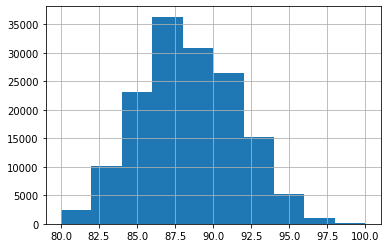

In [46]:
#смотрим на распределение оценок экспертов

df.points.hist()

<BarContainer object of 5 artists>

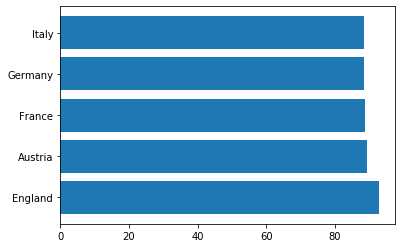

In [71]:
avg_rating = df.groupby('country').apply(lambda x: x.points.mean()).reset_index()
avg_rating.columns = ['country', 'avg_rate']
avg_rating = avg_rating.sort_values('avg_rate', ascending=False).reset_index(level=0, drop=True).head(5)

plt.barh(avg_rating['country'], avg_rating['avg_rate'])

C:\Users\Sergei\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Sergei\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


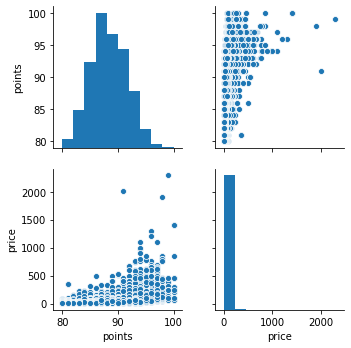

In [73]:
import seaborn as sns

#зависимость рейтинга и цены

sns_rate_price = sns.pairplot(df[['points','price']])
sns_rate_price

In [84]:
#различия оценок в районах США

In [74]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [80]:
us_regions = df[(df['country'] == 'US')].province.unique()
us_regions

array(['California', 'Oregon', 'Washington', 'Idaho', 'New York',
       'Virginia', 'Colorado', 'Arizona', 'America', 'North Carolina',
       'New Mexico', 'Missouri', 'Pennsylvania', 'Ohio', 'Massachusetts',
       'New Jersey', 'Michigan', 'Texas', 'Washington-Oregon', 'Iowa',
       'Vermont', 'Connecticut', 'Kentucky', 'Nevada'], dtype=object)

In [85]:
data = []

for region in us_regions:
    data.append(
        go.Box(y=df[df.province==region].points,
              name=region)
    )

#data
iplot(data, show_link = False)